In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns

In [20]:
#Load the dataset
df=pd.read_csv(r""C:\Users\Mir Abdul Malique\Downloads\Bank TeleMarketing_campaign\bank_marketing_updated_v1.csv"")
# Display the first few rows of the dataset to understand its structure
df.head()

C:\Users\Mir Abdul Malique\AppData\Local\Temp\ipykernel_11400\1464156482.py:2: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\Mir Abdul Malique\Downloads\bank_marketing_updated_v1.csv")


banking marketing Unnamed: 1                    Unnamed: 2 Unnamed: 3  \
0  customer id and age.        NaN  Customer salary and balance.        NaN   
1            customerid        age                        salary    balance   
2                     1         58                        100000       2143   
3                     2         44                         60000         29   
4                     3         33                        120000          2   

                                          Unnamed: 4              Unnamed: 5  \
0  Customer marital status and job with education...                     NaN   
1                                            marital                  jobedu   
2                                            married     management,tertiary   
3                                             single    technician,secondary   
4                                            married  entrepreneur,secondary   

                                   Unnamed: 6 Unnamed: 7  \
0  particular customer before targeted or not        NaN   
1                                    targeted    default   
2                                         yes         no   
3                                         yes         no   
4                                         yes         no   

                           Unnamed: 8 Unnamed: 9   Unnamed: 10 Unnamed: 11  \
0  Loan types: loans or housing loans        NaN  Contact type         NaN   
1                             housing       loan       contact         day   
2                                 yes         no       unknown           5   
3                                 yes         no       unknown           5   
4                                 yes        yes       unknown           5   

        Unnamed: 12       Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16  \
0  month of contact  duration of call         NaN         NaN         NaN   
1             month          duration    campaign       pdays    previous   
2         may, 2017           261 sec           1          -1           0   
3         may, 2017           151 sec           1          -1           0   
4         may, 2017            76 sec           1          -1           0   

                   Unnamed: 17                              Unnamed: 18  
0  outcome of previous contact  response of customer after call happned  
1                     poutcome                                 response  
2                      unknown                                       no  
3                      unknown                                       no  
4                      unknown                                       no

In [21]:
#making it intostructured format
df.columns = df.iloc[1]  # Set the first row as column names
df = df[2:].reset_index(drop=True)  # Drop the first row and reset the index

df.head(6)

1 customerid age  salary balance  marital                  jobedu targeted  \
0          1  58  100000    2143  married     management,tertiary      yes   
1          2  44   60000      29   single    technician,secondary      yes   
2          3  33  120000       2  married  entrepreneur,secondary      yes   
3          4  47   20000    1506  married     blue-collar,unknown       no   
4          5  33       0       1   single         unknown,unknown       no   
5          6  35  100000     231  married     management,tertiary      yes   

1 default housing loan  contact day      month duration campaign pdays  \
0      no     yes   no  unknown   5  may, 2017  261 sec        1    -1   
1      no     yes   no  unknown   5  may, 2017  151 sec        1    -1   
2      no     yes  yes  unknown   5  may, 2017   76 sec        1    -1   
3      no     yes   no  unknown   5  may, 2017   92 sec        1    -1   
4      no      no   no  unknown   5  may, 2017  198 sec        1    -1   
5      no     yes   no  unknown   5  may, 2017  139 sec        1    -1   

1 previous poutcome response  
0        0  unknown       no  
1        0  unknown       no  
2        0  unknown       no  
3        0  unknown       no  
4        0  unknown       no  
5        0  unknown       no

## 1. Understanding the Dataset ##

In [22]:
df.shape

(45211, 19)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  45211 non-null  object
 1   age         45191 non-null  object
 2   salary      45211 non-null  object
 3   balance     45211 non-null  object
 4   marital     45211 non-null  object
 5   jobedu      45211 non-null  object
 6   targeted    45211 non-null  object
 7   default     45211 non-null  object
 8   housing     45211 non-null  object
 9   loan        45211 non-null  object
 10  contact     45211 non-null  object
 11  day         45211 non-null  object
 12  month       45161 non-null  object
 13  duration    45211 non-null  object
 14  campaign    45211 non-null  object
 15  pdays       45211 non-null  object
 16  previous    45211 non-null  object
 17  poutcome    45211 non-null  object
 18  response    45181 non-null  object
dtypes: object(19)
memory usage: 6.6+ MB


In [44]:
df[['job_type', 'education']] = df['jobedu'].str.split(',', expand=True)

# Drop the original 'jobedu' column if no longer needed
df = df.drop(columns=['jobedu'])

# Display the first few rows to verify the results
print(df.head())

1 customerid   age  salary  balance  marital targeted default housing loan  \
0          1  58.0  100000     2143  married      yes      no     yes   no   
1          2  44.0   60000       29   single      yes      no     yes   no   
2          3  33.0  120000        2  married      yes      no     yes  yes   
3          4  47.0   20000     1506  married       no      no     yes   no   
4          5  33.0       0        1   single       no      no      no   no   

1  contact day      month  duration campaign pdays previous poutcome response  \
0  unknown   5  may, 2017     261.0        1    -1        0  unknown       no   
1  unknown   5  may, 2017     151.0        1    -1        0  unknown       no   
2  unknown   5  may, 2017      76.0        1    -1        0  unknown       no   
3  unknown   5  may, 2017      92.0        1    -1        0  unknown       no   
4  unknown   5  may, 2017     198.0        1    -1        0  unknown       no   

1      job_type  education  
0    management

In [45]:
#missing values
df.isnull().sum()

1
customerid        0
age               0
salary            0
balance           0
marital           0
targeted          0
default           0
housing           0
loan              0
contact           0
day               0
month             0
duration      31096
campaign          0
pdays             0
previous          0
poutcome          0
response          0
job_type          0
education         0
dtype: int64

In [25]:
df['age']=df['age'].fillna(df['age'].median())
df['month'].fillna(method='ffill', inplace =True)
# Choose the first mode or handle ties as needed
df['response'].fillna(df['response'].mode()[0],inplace=True)

C:\Users\Mir Abdul Malique\AppData\Local\Temp\ipykernel_11400\1570355460.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['month'].fillna(method='ffill', inplace =True)


In [26]:
df.isnull().sum()

1
customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
dtype: int64

In [27]:
#check duplicates
df.duplicated().sum()

0

## 2. Descriptive Statistics ##

In [28]:
# convert into numeric type
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
df['age']=pd.to_numeric(df['age'],errors='coerce')
df['balance']=pd.to_numeric(df['balance'],errors='coerce')
df['duration'] = pd.to_numeric(df['duration'].str.replace(' sec', ''), errors='coerce')

In [29]:
# Derive summary statistics (mean, median, standard deviation) for relevant columns
df.describe()

1               age         salary        balance      duration
count  45211.000000   45211.000000   45211.000000  14115.000000
mean      40.934795   57006.171065    1362.272058    257.240028
std       10.616926   32085.718415    3044.765829    255.227746
min       18.000000       0.000000   -8019.000000      0.000000
25%       33.000000   20000.000000      72.000000    106.000000
50%       39.000000   60000.000000     448.000000    182.000000
75%       48.000000   70000.000000    1428.000000    316.000000
max       95.000000  120000.000000  102127.000000   3881.000000


Value Counts:
targeted
yes    37091
no      8120
Name: count, dtype: int64


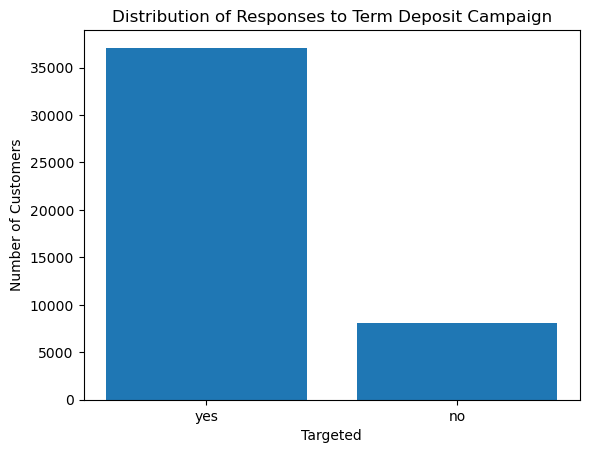

In [30]:
#b. Examine the distribution of the target variable, indicating responses to the term deposit campaign.
value_counts = df['targeted'].value_counts().sort_values(ascending=False)
print("\nValue Counts:")
print(value_counts)

# Visualize the distribution 
import matplotlib.pyplot as plt

plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Targeted")
plt.ylabel("Number of Customers")
plt.title("Distribution of Responses to Term Deposit Campaign")
plt.show()

## 3. Univariate Analysis ##

In [31]:
#a. Examine the distribution of individual key features, such as age, balance, and call duration
# Descriptive statistics
print(df[['age', 'balance', 'duration']].describe())

1               age        balance      duration
count  45211.000000   45211.000000  14115.000000
mean      40.934795    1362.272058    257.240028
std       10.616926    3044.765829    255.227746
min       18.000000   -8019.000000      0.000000
25%       33.000000      72.000000    106.000000
50%       39.000000     448.000000    182.000000
75%       48.000000    1428.000000    316.000000
max       95.000000  102127.000000   3881.000000


In [32]:
# Identifying outliers using the IQR method for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)
outliers = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    # Count outliers and store them in a dictionary
    outliers[col] = {
        'total_outliers': df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    }

# Display outliers for each column
outliers

Index(['age', 'salary', 'balance', 'duration'], dtype='object', name=1)


{'age': {'total_outliers': 487},
 'salary': {'total_outliers': 0},
 'balance': {'total_outliers': 4729},
 'duration': {'total_outliers': 1012}}

C:\Users\Mir Abdul Malique\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


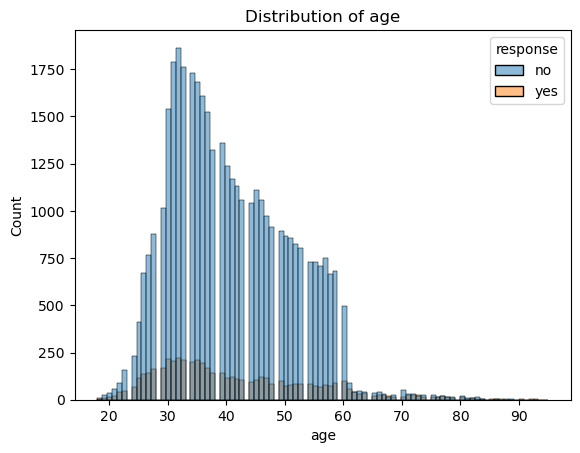

C:\Users\Mir Abdul Malique\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


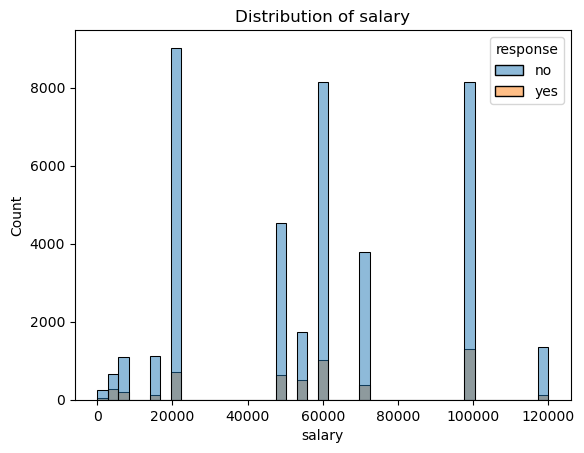

C:\Users\Mir Abdul Malique\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


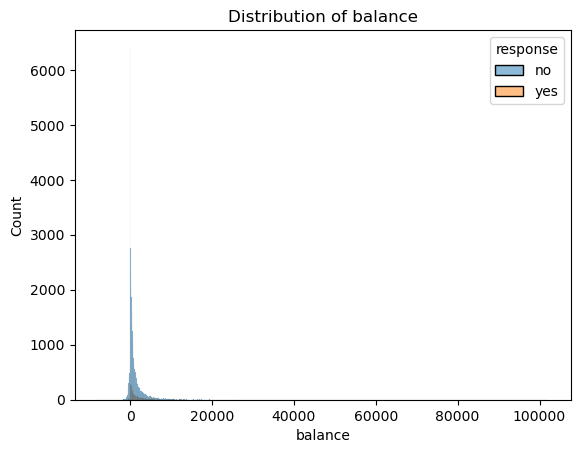

C:\Users\Mir Abdul Malique\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


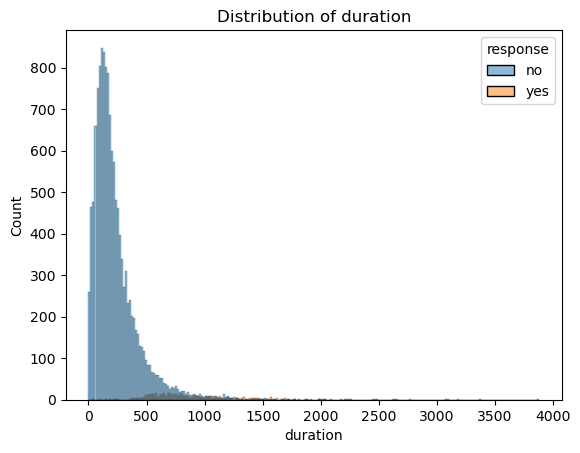

In [38]:
# Employ visual aids like histograms, box plots, and kernel density plots to discern patterns and outliers

# Histograms
for feature in outliers:
    plt.figure()
    sns.histplot(data=df, x=feature, hue='response')
    plt.title(f"Distribution of {feature}")
    plt.show()

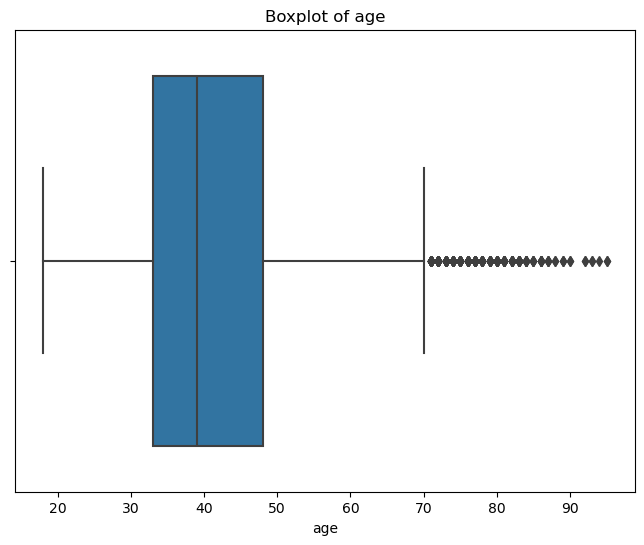

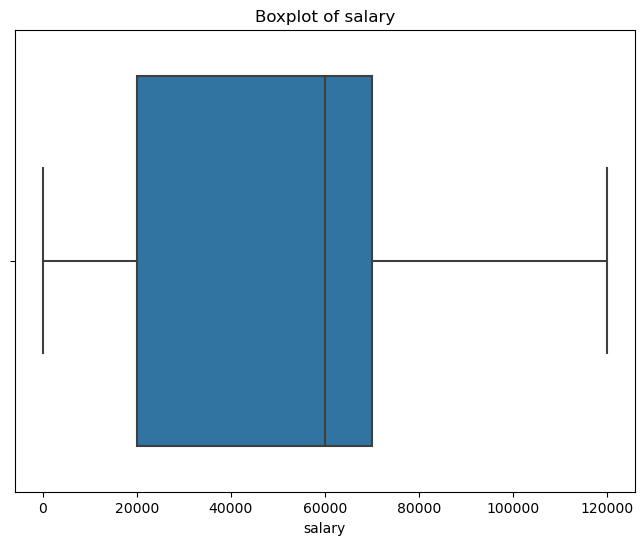

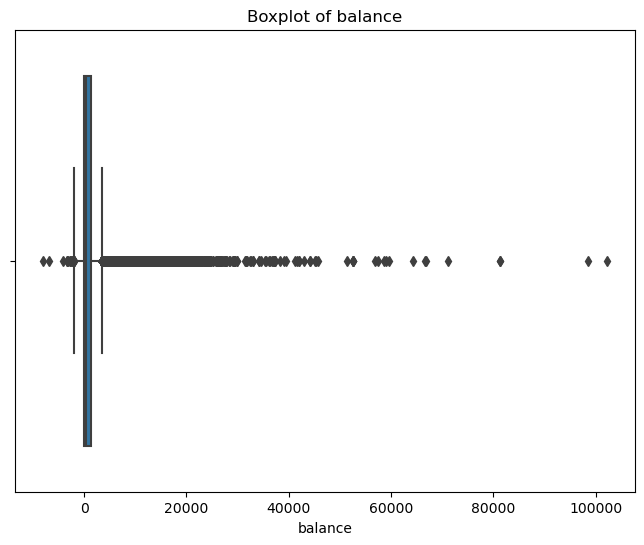

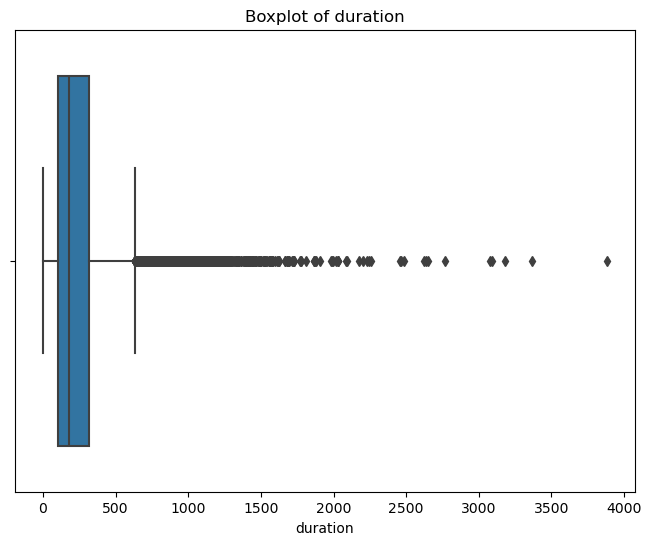

In [39]:
# Loop through features in the outliers dictionary
# Boxplot
for feature in outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])  # Pass the column data, not just the column name
    plt.title(f"Boxplot of {feature}")
    plt.show()

## 4. Bivariate Analysis ##

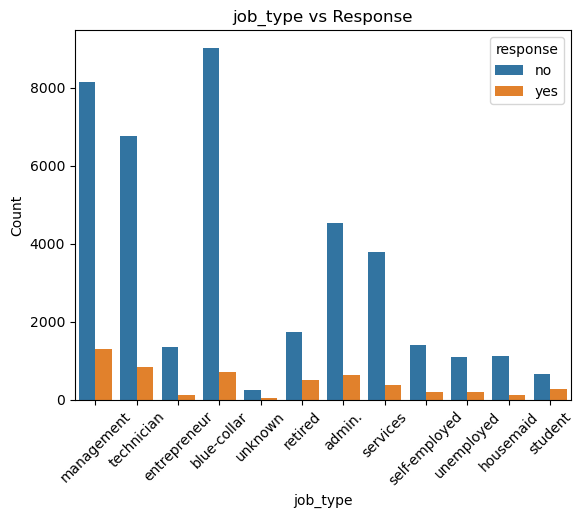

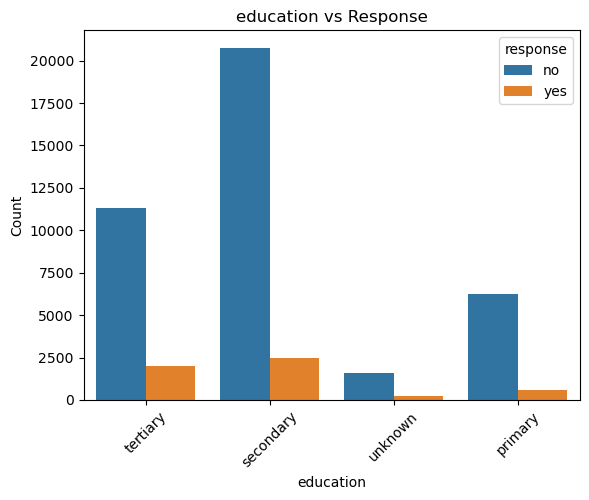

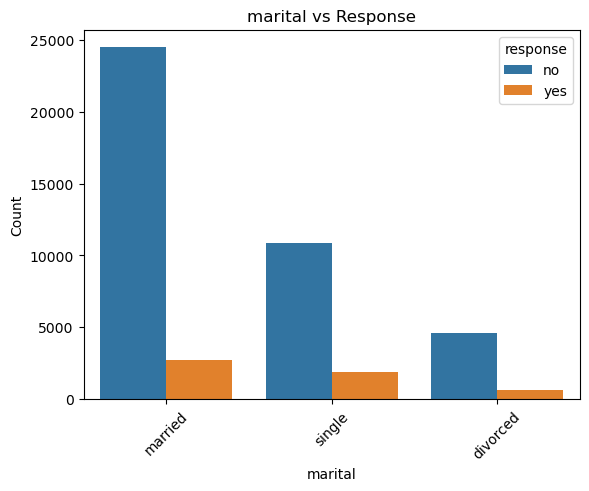

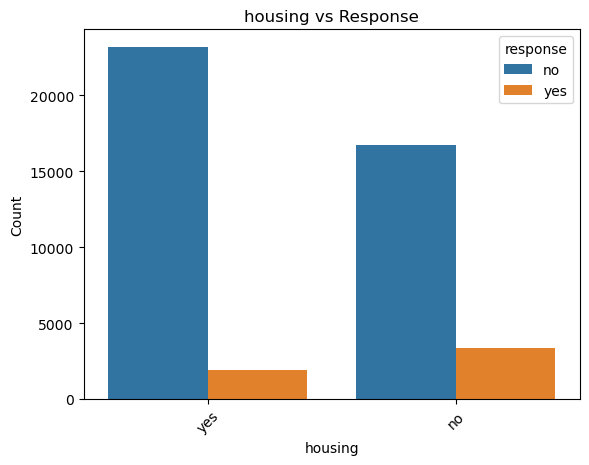

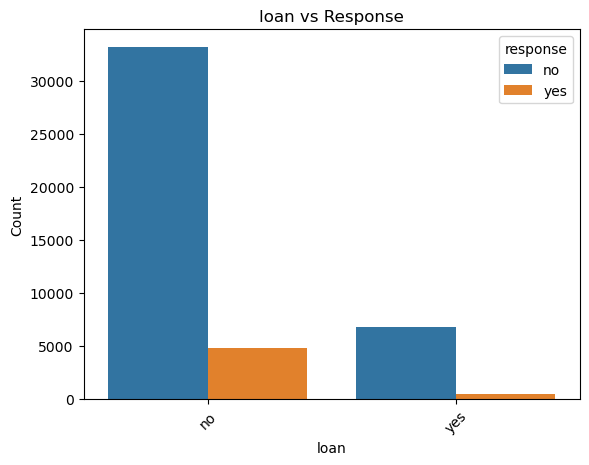

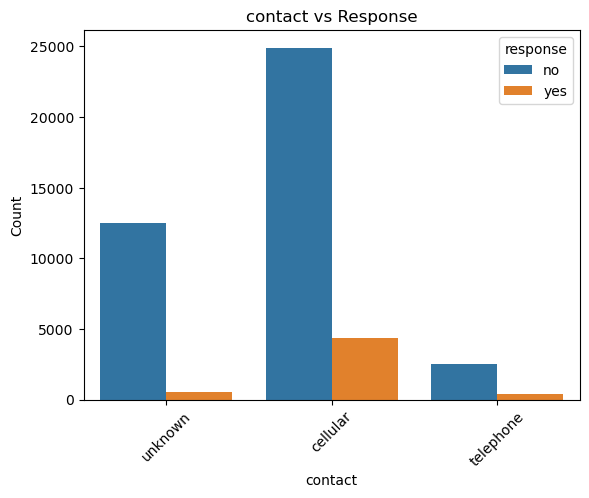

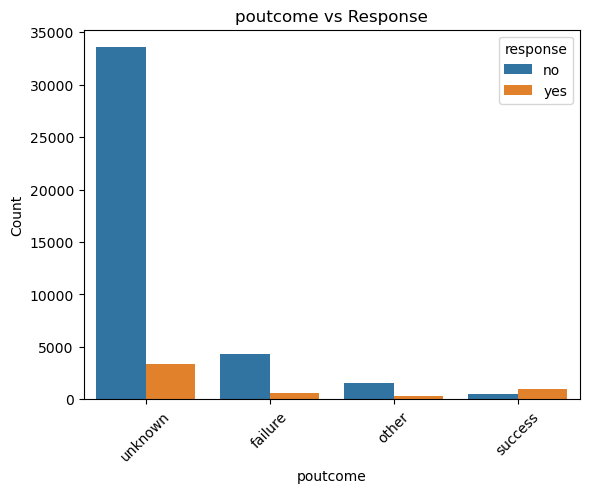

In [47]:
categorical_features = ['job_type','education', 'marital', 'housing', 'loan', 'contact', 'poutcome']
bivariate_analysis = {}
for feature in categorical_features:
    plt.figure()
    sns.countplot(data=df, x=feature, hue='response')
    plt.title(f"{feature} vs Response")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

## 5. Categorical Analysis ##

In [50]:
 #Distribution of categorical variables
categorical_variables= ['job_type','education', 'marital']
categorical_distribution = {feature: df[feature].value_counts() for feature in categorical_variables}
print(categorical_distribution)

{'job_type': job_type
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64, 'education': education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64, 'marital': marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64}


# 6. Temporal Analysis ##

In [67]:
# Extracting year and month from the `month` column
df['month'] = df['month'].str.split(",").str[0]
df['year'] = df['month'].str.split(",").str[1].fillna(2017).astype(int)

temporal_data = df.groupby(['month', 'day', 'response']).size().unstack()
print(temporal_data)

response     no   yes
month day            
apr   1     3.0   7.0
      5     7.0  12.0
      6     3.0   6.0
      8     2.0   4.0
      12   17.0   6.0
...         ...   ...
sep   26    1.0   NaN
      27    7.0   3.0
      28    5.0   5.0
      29    8.0   6.0
      30    7.0   3.0

[449 rows x 2 columns]


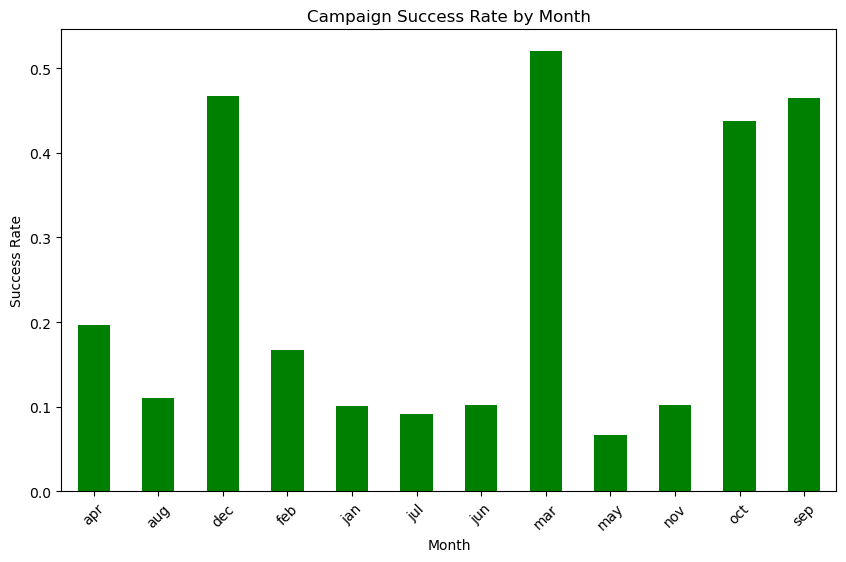

In [58]:
monthly_data = df.groupby(['month', 'response']).size().unstack()
# print(monthly_data)

# Calculate success rates
monthly_data['success_rate'] = monthly_data['yes'] / (monthly_data['yes'] + monthly_data['no'])

# Plot success rates across months
monthly_data['success_rate'].plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Campaign Success Rate by Month')
plt.xlabel('Month')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.show()

C:\Users\Mir Abdul Malique\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


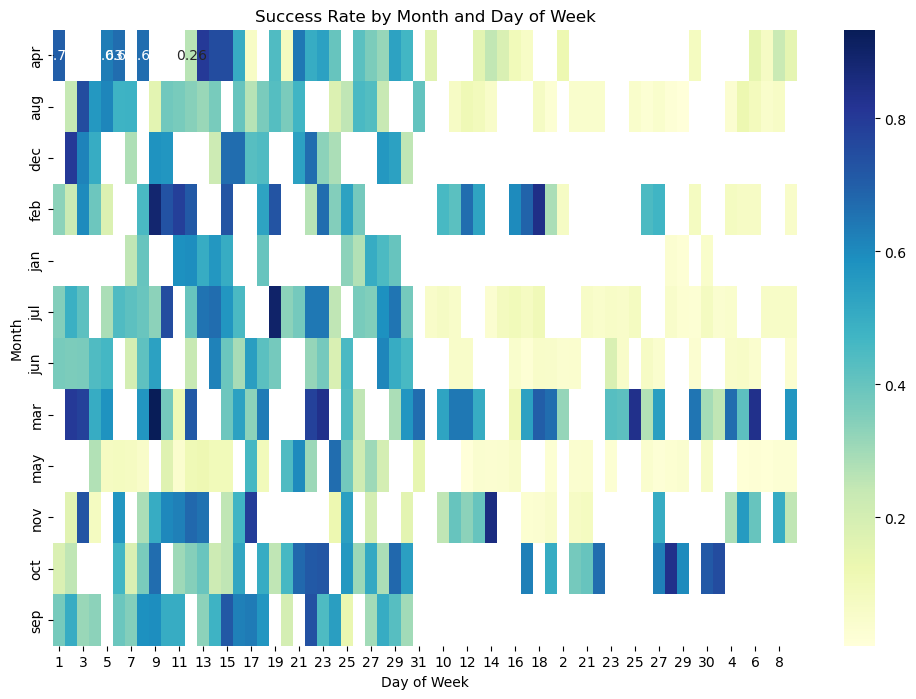

In [69]:
temporal_data['success_rate'] = temporal_data['yes'] / (temporal_data['yes'] + temporal_data['no'])

# Pivot the table for heatmap plotting
temporal_pivot = temporal_data['success_rate'].unstack()

# Heatmap for success rates
plt.figure(figsize=(12, 8))
sns.heatmap(temporal_pivot, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Success Rate by Month and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()

## 7. Feature Engineering ##

In [78]:
# Creating age groups
bins = [0, 18, 30, 45, 60, 120]
labels = ['<18', '18-30', '30-45', '45-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
print(df['age_group'])

# Encoding certain categorical columns

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
print(df_encoded)

0        45-60
1        30-45
2        30-45
3        45-60
4        30-45
         ...  
45206    45-60
45207      60+
45208      60+
45209    45-60
45210    30-45
Name: age_group, Length: 45211, dtype: category
Categories (5, object): ['<18' < '18-30' < '30-45' < '45-60' < '60+']
      customerid   age    salary  balance targeted default housing loan  \
0              1  58.0  100000.0   2143.0      yes      no     yes   no   
1              2  44.0   60000.0     29.0      yes      no     yes   no   
2              3  33.0  120000.0      2.0      yes      no     yes  yes   
3              4  47.0   20000.0   1506.0       no      no     yes   no   
4              5  33.0       0.0      1.0       no      no      no   no   
...          ...   ...       ...      ...      ...     ...     ...  ...   
45206      45207  51.0   60000.0    825.0      yes      no      no   no   
45207      45208  70.5   55000.0   1729.0      yes      no      no   no   
45208      45209  70.5   55000.0   3462.0 

## 8. Correlation Matrix ##

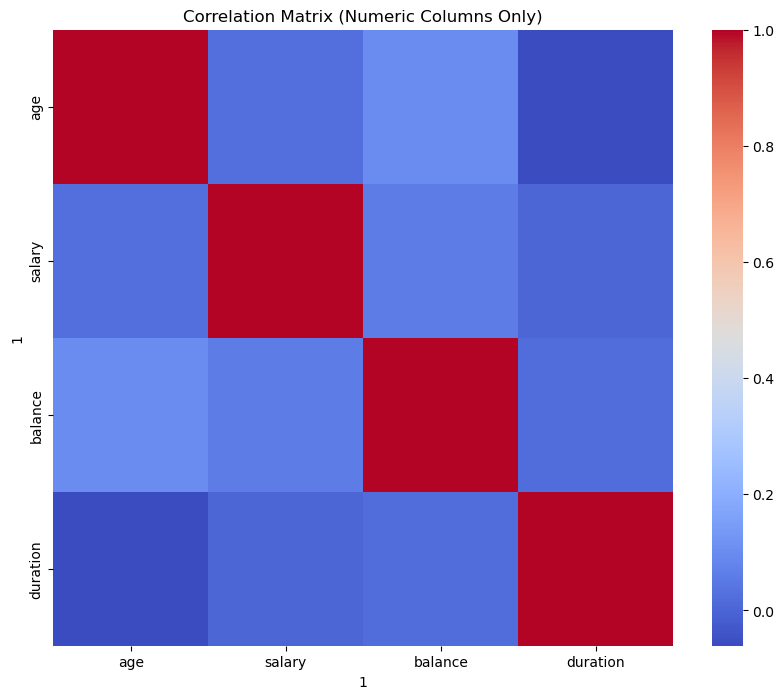

In [40]:
# Selecting only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix_numeric = df[numeric_columns].corr()

# Heatmap of correlations (numeric only)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.show()

## 9.Outlier Detection And Handling ##

In [73]:
# Handling outliers: capping the outliers in numerical columns
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

<Axes: >

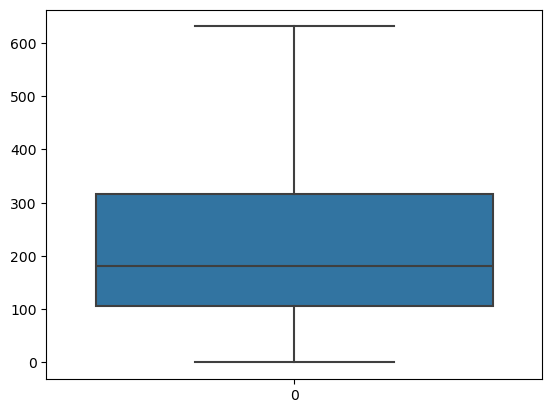

In [75]:
# Visualize Results
sns.boxplot(df[col])

In [79]:
# Saving the refined dataset for further use
refined_file_path = r"C:\Users\Mir Abdul Malique\Downloads\Bank TeleMarketing_campaign\refined_bank_marketing.csv"
df.to_csv(refined_file_path, index=False)

In [83]:
from ydata_profiling import ProfileReport
df1=pd.read_csv(r"C:\Users\Mir Abdul Malique\Downloads\Bank TeleMarketing_campaign\refined_bank_marketing.csv")

profile=ProfileReport(df1)
profile = ProfileReport(df1, title="Bank Telemarketing Campaign")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]